In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip install -q keras

In [0]:
def load_data(data_path: str, test_size=0.2, random_state=42, info=False):
    """Load data from file.
    
    Args:
        data_path: str, file path to read data
        test_size: float, the ratio of test / all
        random_state: int, random seed to split data
        info: bool, control info print
    Returns:
        train_data: np.array, train set
        test_data: np.array, test set
    """
    # imgs = [np.array(Image.open(d)) for d in Path(data_path).iterdir()]
    imgs = []
    for d in Path(data_path).iterdir():
        if info:
            print('Load image: ' + d.name)
        imgs.append(np.array(Image.open(d)))
    data = np.array(imgs)
    train_data, test_data = train_test_split(
        data, test_size=test_size, random_state=random_state)
    return train_data, test_data

In [0]:
def load_label(label_path: str, test_size=0.2, random_state=42):
    """Load label from file.
    
    Args:
        label_path: str, file path to read label
        test_size: float, the ratio of test / all, 
            this arg should match up test_size in load_data
        random_state: int, random seed to split data
            this arg should match up random_state in load_data
    """
    with open(label_path, 'r') as f:
        labels = f.readline()
    train_label, test_label = train_test_split(
        labels.split('\t'), test_size=test_size, random_state=random_state)
    le = LabelEncoder()
    le.fit(train_label)
    return le.transform(train_label), le.transform(test_label)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
import shutil
from PIL import Image
import numpy as np

In [4]:
train_label, test_label = load_label('./drive/data/FacePlace/Asian.txt')
train_data, test_data = load_data('./drive/data/FacePlace/Asian/', info=True)
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
train_label, val_label = train_test_split(train_label, test_size=0.2, random_state=42)

Load image: AM0316_1101_90L.jpg
Load image: AM0316_1101_90R.jpg
Load image: AM0316_1101_NE.jpg
Load image: AM0316_2201_00F.jpg
Load image: AM0316_2201_30L.jpg
Load image: AM0316_2201_30R.jpg
Load image: AM0316_2201_45L.jpg
Load image: AM0316_1100_90R.jpg
Load image: AM0316_2201_45R.jpg
Load image: AM0316_1100_90L.jpg
Load image: AM0316_1101_45L.jpg
Load image: AM0316_1101_30R.jpg
Load image: AM0316_1101_30L.jpg
Load image: AM0316_1101_00F.jpg
Load image: AM0316_1101_45R.jpg
Load image: AM0316_1100_60R.jpg
Load image: AM0316_2201_60L.jpg
Load image: AM0317_1100_45L.jpg
Load image: AM0317_1100_60R.jpg
Load image: AM0317_1100_90L.jpg
Load image: AM0317_1100_90R.jpg
Load image: AM0317_1100_NE.jpg
Load image: AM0316_2201_90R.jpg
Load image: AM0317_2201_00F.jpg
Load image: AM0316_2201_NE.jpg
Load image: AM0317_1100_30L.jpg
Load image: AM0317_1100_30R.jpg
Load image: AM0316_2201_60R.jpg
Load image: AM0317_1100_45R.jpg
Load image: AM0317_1100_60L.jpg
Load image: AM0317_1100_00F.jpg
Load image:

Load image: AF0330_2101_45L.jpg
Load image: AF0330_2101_30L.jpg
Load image: AF0330_2101_45R.jpg
Load image: AF0331_1100_00F.jpg
Load image: AF0330_2101_60L.jpg
Load image: AF0331_1100_30L.jpg
Load image: AF0331_1101_30R.jpg
Load image: AF0331_1100_30R.jpg
Load image: AF0331_1100_90R.jpg
Load image: AF0331_1101_30L.jpg
Load image: AF0331_1100_45L.jpg
Load image: AF0331_1100_90L.jpg
Load image: AF0331_1100_60R.jpg
Load image: AF0331_1101_00F.jpg
Load image: AF0331_1101_45L.jpg
Load image: AF0331_1100_60L.jpg
Load image: AF0331_1100_45R.jpg
Load image: AF0331_1101_45R.jpg
Load image: AF0331_2201_45R.jpg
Load image: AF0331_1101_60L.jpg
Load image: AF0331_1101_90R.jpg
Load image: AF0331_1101_90L.jpg
Load image: AF0331_1101_NE.jpg
Load image: AF0331_2201_30L.jpg
Load image: AF0331_2201_30R.jpg
Load image: AF0331_2201_45L.jpg
Load image: AF0331_1101_60R.jpg
Load image: AF0331_2201_00F.jpg
Load image: AF0331_2201_60L.jpg
Load image: AF0331_2201_60R.jpg
Load image: AF0331_2201_90L.jpg
Load imag

Load image: AF0310_1101_45R.jpg
Load image: AF0310_1101_60L.jpg
Load image: AF0310_1101_DI.jpg
Load image: AF0310_1101_HA.jpg
Load image: AF0310_1101_NE.jpg
Load image: AF0310_2202_60R.jpg
Load image: AF0310_2202_45L.jpg
Load image: AF0310_2202_90L.jpg
Load image: AF0310_2202_30R.jpg
Load image: AF0310_2202_60L.jpg
Load image: AF0310_2202_00F.jpg
Load image: AF0310_2202_45R.jpg
Load image: AF0310_2202_30L.jpg
Load image: AF0310_1101_SU.jpg
Load image: AF0310_1101_SA.jpg
Load image: AF0310_2202_90R.jpg
Load image: AF0311_1110_90R.jpg
Load image: AF0310_2202_NE.jpg
Load image: AF0311_1110_60R.jpg
Load image: AF0311_1110_45L.jpg
Load image: AF0311_1110_00F.jpg
Load image: AF0311_1110_30R.jpg
Load image: AF0311_1110_45R.jpg
Load image: AF0311_1110_90L.jpg
Load image: AF0311_1110_30L.jpg
Load image: AF0311_1110_60L.jpg
Load image: AF0311_1110_NE.jpg
Load image: AF0311_2211_00F.jpg
Load image: AF0311_2211_30R.jpg
Load image: AF0312_1100_00F.jpg
Load image: AF0311_2211_NE.jpg
Load image: AF03

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # randomly flip images
datagen.fit(train_data)

Using TensorFlow backend.


In [0]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten

In [0]:
def vgg19(input_shape: tuple, classes: int):
    conv_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        conv_base,
        Flatten(),
        Dense(512, activation='relu'),
        Dense(classes, activation='softmax')
    ])
    conv_base.trainable = False
    model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [8]:
model = vgg19(input_shape=train_data[0].shape, classes=train_label.max() + 1)

history = model.fit_generator(
            datagen.flow(train_data, train_label, batch_size=20),
            epochs=80,
            validation_data=(val_data, val_label))

Epoch 1/80
42/42 [==============================] - 26s 629ms/step - loss: 5.4431 - acc: 0.0500 - val_loss: 4.2202 - val_acc: 0.0388
Epoch 2/80
42/42 [==============================] - 21s 494ms/step - loss: 3.2042 - acc: 0.2210 - val_loss: 3.7829 - val_acc: 0.1408
Epoch 3/80
42/42 [==============================] - 21s 498ms/step - loss: 2.6200 - acc: 0.3633 - val_loss: 3.7178 - val_acc: 0.1311
Epoch 4/80
42/42 [==============================] - 21s 497ms/step - loss: 2.2495 - acc: 0.4252 - val_loss: 3.3323 - val_acc: 0.1748
Epoch 5/80
42/42 [==============================] - 21s 496ms/step - loss: 1.7330 - acc: 0.5843 - val_loss: 3.4283 - val_acc: 0.1699
Epoch 6/80
30/42 [====================>.........] - ETA: 4s - loss: 1.6585 - acc: 0.5900

42/42 [==============================] - 21s 498ms/step - loss: 1.6661 - acc: 0.5741 - val_loss: 3.5856 - val_acc: 0.1505
Epoch 7/80
42/42 [==============================] - 21s 497ms/step - loss: 1.2408 - acc: 0.6963 - val_loss: 3.3443 - val_acc: 0.1456
Epoch 8/80
42/42 [==============================] - 21s 497ms/step - loss: 1.0719 - acc: 0.7332 - val_loss: 2.8808 - val_acc: 0.2379
Epoch 9/80
42/42 [==============================] - 21s 498ms/step - loss: 0.8765 - acc: 0.7713 - val_loss: 3.4389 - val_acc: 0.1748
Epoch 10/80
42/42 [==============================] - 21s 496ms/step - loss: 0.7673 - acc: 0.7975 - val_loss: 3.4136 - val_acc: 0.1990
Epoch 11/80
37/42 [=========================>....] - ETA: 1s - loss: 0.7204 - acc: 0.7919

42/42 [==============================] - 21s 496ms/step - loss: 0.7349 - acc: 0.7939 - val_loss: 3.4143 - val_acc: 0.2184
Epoch 12/80
42/42 [==============================] - 21s 496ms/step - loss: 0.6106 - acc: 0.8285 - val_loss: 3.5361 - val_acc: 0.2039
Epoch 13/80
42/42 [==============================] - 21s 497ms/step - loss: 0.7199 - acc: 0.8058 - val_loss: 3.5122 - val_acc: 0.1942
Epoch 14/80
42/42 [==============================] - 21s 499ms/step - loss: 0.4739 - acc: 0.8833 - val_loss: 3.2054 - val_acc: 0.2233
Epoch 15/80
42/42 [==============================] - 21s 500ms/step - loss: 0.4612 - acc: 0.8749 - val_loss: 3.6443 - val_acc: 0.2039
Epoch 16/80
37/42 [=========================>....] - ETA: 2s - loss: 0.4389 - acc: 0.8784

42/42 [==============================] - 21s 501ms/step - loss: 0.4284 - acc: 0.8773 - val_loss: 3.5599 - val_acc: 0.2039
Epoch 17/80
42/42 [==============================] - 21s 501ms/step - loss: 0.6923 - acc: 0.7957 - val_loss: 4.1441 - val_acc: 0.1699
Epoch 18/80
42/42 [==============================] - 21s 498ms/step - loss: 0.4200 - acc: 0.8952 - val_loss: 4.0171 - val_acc: 0.1650
Epoch 19/80
42/42 [==============================] - 21s 499ms/step - loss: 0.4098 - acc: 0.8952 - val_loss: 3.2788 - val_acc: 0.2427
Epoch 20/80
42/42 [==============================] - 21s 499ms/step - loss: 0.3501 - acc: 0.9083 - val_loss: 3.3338 - val_acc: 0.2330
Epoch 21/80
38/42 [==========================>...] - ETA: 1s - loss: 0.2837 - acc: 0.9224

42/42 [==============================] - 21s 500ms/step - loss: 0.3143 - acc: 0.9142 - val_loss: 3.0808 - val_acc: 0.2816
Epoch 22/80
42/42 [==============================] - 21s 501ms/step - loss: 0.2811 - acc: 0.9285 - val_loss: 3.4744 - val_acc: 0.2524
Epoch 23/80
42/42 [==============================] - 21s 501ms/step - loss: 0.2560 - acc: 0.9333 - val_loss: 3.4249 - val_acc: 0.2767
Epoch 24/80
42/42 [==============================] - 21s 503ms/step - loss: 0.2470 - acc: 0.9321 - val_loss: 4.1447 - val_acc: 0.1990
Epoch 25/80
42/42 [==============================] - 21s 502ms/step - loss: 0.2134 - acc: 0.9452 - val_loss: 3.2478 - val_acc: 0.2913
Epoch 26/80
37/42 [=========================>....] - ETA: 2s - loss: 0.1812 - acc: 0.9459

42/42 [==============================] - 21s 501ms/step - loss: 0.1767 - acc: 0.9500 - val_loss: 3.6235 - val_acc: 0.2233
Epoch 27/80
42/42 [==============================] - 21s 500ms/step - loss: 0.2188 - acc: 0.9345 - val_loss: 3.7165 - val_acc: 0.2282
Epoch 28/80
42/42 [==============================] - 26s 620ms/step - loss: 0.1925 - acc: 0.9452 - val_loss: 4.5417 - val_acc: 0.1505
Epoch 29/80
42/42 [==============================] - 21s 502ms/step - loss: 0.2703 - acc: 0.9297 - val_loss: 3.8113 - val_acc: 0.2427
Epoch 30/80
42/42 [==============================] - 21s 499ms/step - loss: 0.4236 - acc: 0.8850 - val_loss: 4.1004 - val_acc: 0.2379
Epoch 31/80
37/42 [=========================>....] - ETA: 2s - loss: 0.3820 - acc: 0.8905

42/42 [==============================] - 21s 501ms/step - loss: 0.3744 - acc: 0.8904 - val_loss: 4.1017 - val_acc: 0.2379
Epoch 32/80
42/42 [==============================] - 21s 501ms/step - loss: 0.2418 - acc: 0.9250 - val_loss: 4.2392 - val_acc: 0.2573
Epoch 33/80
42/42 [==============================] - 21s 500ms/step - loss: 0.4770 - acc: 0.8659 - val_loss: 4.4474 - val_acc: 0.2282
Epoch 34/80
42/42 [==============================] - 21s 501ms/step - loss: 0.2890 - acc: 0.9178 - val_loss: 3.4185 - val_acc: 0.2670
Epoch 35/80
42/42 [==============================] - 21s 499ms/step - loss: 0.1760 - acc: 0.9595 - val_loss: 3.7454 - val_acc: 0.2621
Epoch 36/80
37/42 [=========================>....] - ETA: 2s - loss: 0.1839 - acc: 0.9473

42/42 [==============================] - 21s 499ms/step - loss: 0.1802 - acc: 0.9452 - val_loss: 3.5363 - val_acc: 0.2816
Epoch 37/80
42/42 [==============================] - 21s 499ms/step - loss: 0.1537 - acc: 0.9524 - val_loss: 4.0318 - val_acc: 0.2282
Epoch 38/80
42/42 [==============================] - 21s 500ms/step - loss: 0.1200 - acc: 0.9738 - val_loss: 3.8329 - val_acc: 0.3010
Epoch 39/80
42/42 [==============================] - 21s 499ms/step - loss: 0.1330 - acc: 0.9655 - val_loss: 3.7309 - val_acc: 0.2573
Epoch 40/80
42/42 [==============================] - 21s 499ms/step - loss: 0.1159 - acc: 0.9583 - val_loss: 4.0907 - val_acc: 0.2573
Epoch 41/80
37/42 [=========================>....] - ETA: 2s - loss: 0.1064 - acc: 0.9716

42/42 [==============================] - 21s 499ms/step - loss: 0.1087 - acc: 0.9702 - val_loss: 3.1930 - val_acc: 0.2961
Epoch 42/80
42/42 [==============================] - 21s 499ms/step - loss: 0.0970 - acc: 0.9726 - val_loss: 3.8899 - val_acc: 0.2330
Epoch 43/80
42/42 [==============================] - 21s 500ms/step - loss: 0.5738 - acc: 0.8564 - val_loss: 4.5355 - val_acc: 0.2282
Epoch 44/80
42/42 [==============================] - 21s 499ms/step - loss: 0.3438 - acc: 0.8988 - val_loss: 4.6875 - val_acc: 0.2233
Epoch 45/80
42/42 [==============================] - 21s 499ms/step - loss: 0.1642 - acc: 0.9595 - val_loss: 4.1464 - val_acc: 0.2913
Epoch 46/80
38/42 [==========================>...] - ETA: 1s - loss: 0.1518 - acc: 0.9632

42/42 [==============================] - 21s 500ms/step - loss: 0.1464 - acc: 0.9643 - val_loss: 4.5042 - val_acc: 0.2427
Epoch 47/80
42/42 [==============================] - 21s 501ms/step - loss: 0.1019 - acc: 0.9690 - val_loss: 3.9640 - val_acc: 0.2233
Epoch 48/80
42/42 [==============================] - 21s 501ms/step - loss: 0.1128 - acc: 0.9607 - val_loss: 3.8718 - val_acc: 0.2524
Epoch 49/80
42/42 [==============================] - 21s 502ms/step - loss: 0.1072 - acc: 0.9714 - val_loss: 4.1365 - val_acc: 0.2621
Epoch 50/80
42/42 [==============================] - 21s 502ms/step - loss: 0.0868 - acc: 0.9809 - val_loss: 3.9765 - val_acc: 0.1990
Epoch 51/80
37/42 [=========================>....] - ETA: 2s - loss: 0.0869 - acc: 0.9770

42/42 [==============================] - 21s 500ms/step - loss: 0.0940 - acc: 0.9726 - val_loss: 3.9301 - val_acc: 0.2718
Epoch 52/80
42/42 [==============================] - 21s 502ms/step - loss: 0.1170 - acc: 0.9702 - val_loss: 5.3015 - val_acc: 0.1942
Epoch 53/80
42/42 [==============================] - 21s 501ms/step - loss: 0.0687 - acc: 0.9821 - val_loss: 5.1149 - val_acc: 0.1796
Epoch 54/80
42/42 [==============================] - 21s 500ms/step - loss: 0.0999 - acc: 0.9702 - val_loss: 5.6892 - val_acc: 0.1796
Epoch 55/80
42/42 [==============================] - 21s 502ms/step - loss: 0.1017 - acc: 0.9714 - val_loss: 4.4578 - val_acc: 0.2282
Epoch 56/80
37/42 [=========================>....] - ETA: 2s - loss: 0.0987 - acc: 0.9689

42/42 [==============================] - 21s 500ms/step - loss: 0.0903 - acc: 0.9726 - val_loss: 4.7334 - val_acc: 0.2039
Epoch 57/80
42/42 [==============================] - 21s 500ms/step - loss: 0.0892 - acc: 0.9786 - val_loss: 4.8012 - val_acc: 0.1893
Epoch 58/80
42/42 [==============================] - 21s 501ms/step - loss: 0.0719 - acc: 0.9738 - val_loss: 4.0936 - val_acc: 0.2767
Epoch 59/80
42/42 [==============================] - 21s 501ms/step - loss: 0.0966 - acc: 0.9726 - val_loss: 4.5096 - val_acc: 0.2330
Epoch 60/80
42/42 [==============================] - 21s 501ms/step - loss: 0.0587 - acc: 0.9869 - val_loss: 4.2911 - val_acc: 0.2282
Epoch 61/80
37/42 [=========================>....] - ETA: 2s - loss: 0.1217 - acc: 0.9730

42/42 [==============================] - 21s 499ms/step - loss: 0.1218 - acc: 0.9714 - val_loss: 5.3744 - val_acc: 0.1748
Epoch 62/80
42/42 [==============================] - 21s 501ms/step - loss: 0.1505 - acc: 0.9374 - val_loss: 7.0681 - val_acc: 0.1456
Epoch 63/80
42/42 [==============================] - 21s 501ms/step - loss: 0.6904 - acc: 0.8499 - val_loss: 5.9543 - val_acc: 0.1408
Epoch 64/80
42/42 [==============================] - 21s 502ms/step - loss: 0.2894 - acc: 0.9416 - val_loss: 4.4216 - val_acc: 0.2184
Epoch 65/80
42/42 [==============================] - 21s 501ms/step - loss: 0.1246 - acc: 0.9690 - val_loss: 4.1115 - val_acc: 0.2524
Epoch 66/80
37/42 [=========================>....] - ETA: 2s - loss: 0.1412 - acc: 0.9568

42/42 [==============================] - 21s 501ms/step - loss: 0.1352 - acc: 0.9571 - val_loss: 5.2483 - val_acc: 0.2039
Epoch 67/80
42/42 [==============================] - 21s 500ms/step - loss: 0.1036 - acc: 0.9643 - val_loss: 5.4066 - val_acc: 0.1748
Epoch 68/80
42/42 [==============================] - 21s 502ms/step - loss: 0.0968 - acc: 0.9714 - val_loss: 4.8490 - val_acc: 0.2233
Epoch 69/80
42/42 [==============================] - 21s 500ms/step - loss: 0.0709 - acc: 0.9786 - val_loss: 4.6302 - val_acc: 0.2087
Epoch 70/80
42/42 [==============================] - 21s 503ms/step - loss: 0.0442 - acc: 0.9893 - val_loss: 4.5614 - val_acc: 0.2233
Epoch 71/80
37/42 [=========================>....] - ETA: 2s - loss: 0.0467 - acc: 0.9865

42/42 [==============================] - 21s 500ms/step - loss: 0.0459 - acc: 0.9857 - val_loss: 5.0428 - val_acc: 0.2136
Epoch 72/80
42/42 [==============================] - 21s 501ms/step - loss: 0.0390 - acc: 0.9869 - val_loss: 4.6554 - val_acc: 0.2670
Epoch 73/80
42/42 [==============================] - 21s 501ms/step - loss: 0.0566 - acc: 0.9857 - val_loss: 5.9182 - val_acc: 0.2039
Epoch 74/80
42/42 [==============================] - 21s 501ms/step - loss: 0.0411 - acc: 0.9881 - val_loss: 5.2111 - val_acc: 0.2282
Epoch 75/80
42/42 [==============================] - 21s 500ms/step - loss: 0.0874 - acc: 0.9762 - val_loss: 5.0538 - val_acc: 0.2670
Epoch 76/80
37/42 [=========================>....] - ETA: 2s - loss: 0.0696 - acc: 0.9824

42/42 [==============================] - 21s 499ms/step - loss: 0.0686 - acc: 0.9821 - val_loss: 4.9642 - val_acc: 0.2670
Epoch 77/80
42/42 [==============================] - 21s 499ms/step - loss: 0.2021 - acc: 0.9404 - val_loss: 5.9891 - val_acc: 0.1359
Epoch 78/80
42/42 [==============================] - 21s 499ms/step - loss: 0.1186 - acc: 0.9619 - val_loss: 5.4267 - val_acc: 0.1942
Epoch 79/80
42/42 [==============================] - 21s 501ms/step - loss: 0.1398 - acc: 0.9512 - val_loss: 5.4964 - val_acc: 0.2087
Epoch 80/80
42/42 [==============================] - 21s 501ms/step - loss: 0.1325 - acc: 0.9666 - val_loss: 4.1003 - val_acc: 0.2524


In [0]:
model.save('./drive/asian_vgg19.h5')

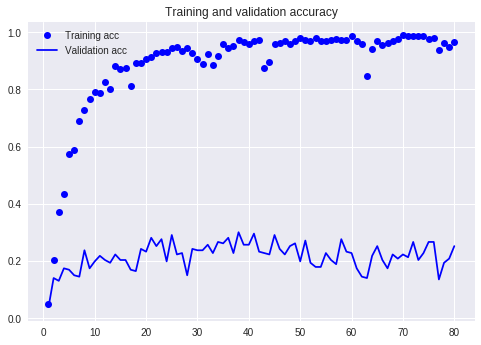

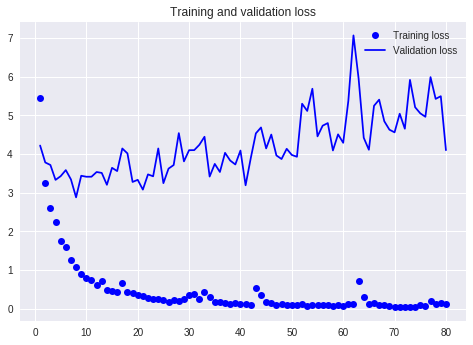

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()